# Data manipulation in Pandas

To cover:

Key concepts of series and dataframe objects  
Reading data  
Summaries / aggregations / split, apply, combine  
Joins  
Speed  
Transformations (e.g. apply etc)  
Functions - e.g. regex, etc  
Dates and times?  


Other demos:
Flask app?
GUI (e.g. TKinter?)
Maybe better: interactive charts with Bokeh or Chartify



In [1]:
import numpy as np
import pandas as pd

### Read our dataset - the Tableau superstore data!

In [2]:
try:
    superstore = pd.read_excel('data/superstore.xslx')
except FileNotFoundError:
    superstore = pd.read_excel('https://query.data.world/s/n2pyux2nabxy4c43zl3uugxsk5gt6v')

In [66]:
# Quick check: do we have the right number of rows?
assert len(superstore) == 51290

In [67]:
type(superstore)

pandas.core.frame.DataFrame

In [68]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


### A few basic data exploration tasks

In [11]:
# Basic summary of the table
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null datetime64[ns]
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
Postal Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null fl

In [12]:
# How many countries do we have?
superstore['Country'].nunique()

165

In [13]:
# List of countries
superstore['Country'].value_counts()

United States         9994
Australia             2837
France                2827
Mexico                2635
Germany               2063
China                 1880
United Kingdom        1633
Brazil                1593
India                 1554
Indonesia             1390
Turkey                1378
Italy                 1100
Nigeria                905
Spain                  859
Dominican Republic     742
El Salvador            736
Cuba                   724
Honduras               713
Philippines            681
New Zealand            628
Nicaragua              614
Iran                   607
Guatemala              521
Egypt                  487
South Africa           457
Morocco                451
Netherlands            435
Argentina              390
Iraq                   388
Panama                 388
                      ... 
Lesotho                  6
Burkina Faso             6
Greece                   6
Botswana                 4
Montenegro               4
Macedonia                4
T

In [14]:
# Total sales
superstore['Sales'].sum()

12642501.90988

In [15]:
# Number of unique values for each column
superstore.nunique()

Row ID            51290
Order ID          25728
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID       17415
Customer Name       796
Segment               3
Postal Code         631
City               3650
State              1102
Country             165
Region               23
Market                5
Product ID         3788
Category              3
Sub-Category         17
Product Name       3788
Sales             27200
Quantity             14
Discount             29
Profit            28234
Shipping Cost     16753
Order Priority        4
dtype: int64

### Quick look at the distributions of numeric variables

In [36]:
import seaborn as sns

In [64]:
plotdata = superstore.select_dtypes('number').drop('Postal Code', axis=1)
plotdata.dtypes

Row ID             int64
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Shipping Cost    float64
dtype: object

C:\Users\stephen_webb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


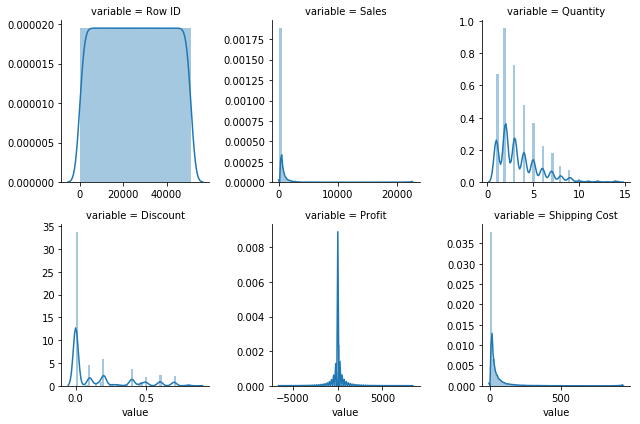

In [65]:
g = sns.FacetGrid(plotdata.melt(), col='variable', col_wrap=3, sharey=False, sharex=False)
g.map(sns.distplot, 'value')
plt.show()

### Aggregations: [Split, apply, combine](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#GroupBy:-Split,-Apply,-Combine)

In [16]:
# Sales by segment
superstore.groupby('Segment')['Sales'].sum()

Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64

In [17]:
# Sales by market and segment
superstore.groupby(['Market', 'Segment'])['Sales'].sum()

Market        Segment    
Africa        Consumer       4.237668e+05
              Corporate      2.049390e+05
              Home Office    1.550674e+05
Asia Pacific  Consumer       2.056466e+06
              Corporate      1.215139e+06
              Home Office    7.710532e+05
Europe        Consumer       1.696749e+06
              Corporate      1.033907e+06
              Home Office    5.566802e+05
LATAM         Consumer       1.133847e+06
              Corporate      6.452525e+05
              Home Office    3.855057e+05
USCA          Consumer       1.197120e+06
              Corporate      7.254601e+05
              Home Office    4.415485e+05
Name: Sales, dtype: float64

In [18]:
# We can store the results of a query in an object:
sales_summary = superstore.groupby(['Market', 'Segment'])['Sales'].sum()
type(sales_summary)

pandas.core.series.Series

In [24]:
# We now have an example of a 'multi-index' (or hierarchical index)
sales_summary.index

MultiIndex(levels=[['Africa', 'Asia Pacific', 'Europe', 'LATAM', 'USCA'], ['Consumer', 'Corporate', 'Home Office']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Market', 'Segment'])

In [19]:
# What were the sales figures for Asia Pacific?
sales_summary['Asia Pacific']

Segment
Consumer       2.056466e+06
Corporate      1.215139e+06
Home Office    7.710532e+05
Name: Sales, dtype: float64

In [20]:
# What were the sames for Consumer and Corporate segments in Europe?
sales_summary.loc[('Europe', ['Consumer', 'Corporate'])]

Market  Segment  
Europe  Consumer     1.696749e+06
        Corporate    1.033907e+06
Name: Sales, dtype: float64

### Basic plotting: Sales by month

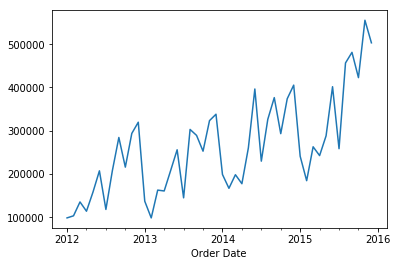

In [22]:
import matplotlib.pyplot as plt
superstore.set_index('Order Date').resample('1M')['Sales'].sum().plot()
plt.show()

### Transformations: creating new columns etc

In [35]:
# Group by ... and create profit ratio column (profit / sales)
grouped = superstore.groupby('Segment')[['Sales', 'Profit']].sum()
grouped['profit_ratio'] = grouped['Profit'] / grouped['Sales']
grouped

,Sales,Profit,profit_ratio
Segment,,,
Consumer,6.507949e+06,749239.78206,0.115127
Corporate,3.824698e+06,441208.32866,0.115358
Home Office,2.309855e+06,277009.18056,0.119925
